In [27]:
import matplotlib.ticker as plticker
import numpy as np
import matplotlib.pyplot as plt
try:
    from PIL import Image
except ImportError:
    import Image

In [ ]:
# install DataStax with "pip install cassandra-driver"
# run notebook with notebook --NotebookApp.iopub_data_rate_limit=1.0e10 --allow-root to not get problems with data limit

from cassandra.cluster import Cluster
cluster = Cluster()
session = cluster.connect()

In [53]:
# Constants 
GRID_RES = 10
N_CELLS = GRID_RES * GRID_RES
STEP_X, STEP_Y = 3480 / GRID_RES, 2470 / GRID_RES
CELL_AREA = STEP_X * STEP_Y

In [39]:
def index_to_grid_cell(index):
    x = index % GRID_RES
    y = index // GRID_RES
    return (x * STEP_X + STEP_X // 2, y * STEP_Y + STEP_Y // 2)

In [68]:
rows = session.execute("SELECT * from covid.cell_counts")
pairs = [(row.cell, row.count) for row in rows]

grid_cells = np.array([index_to_grid_cell(index) for (index, _) in pairs])
x, y = grid_cells[:, 0], grid_cells[:, 1]
counts = [count for (_, count) in pairs]
total = sum(counts)
# TODO: Figure out why CELL_AREA doesn't work?
areas = np.array([(float(count) / float(total)) * 2000 for count in counts])

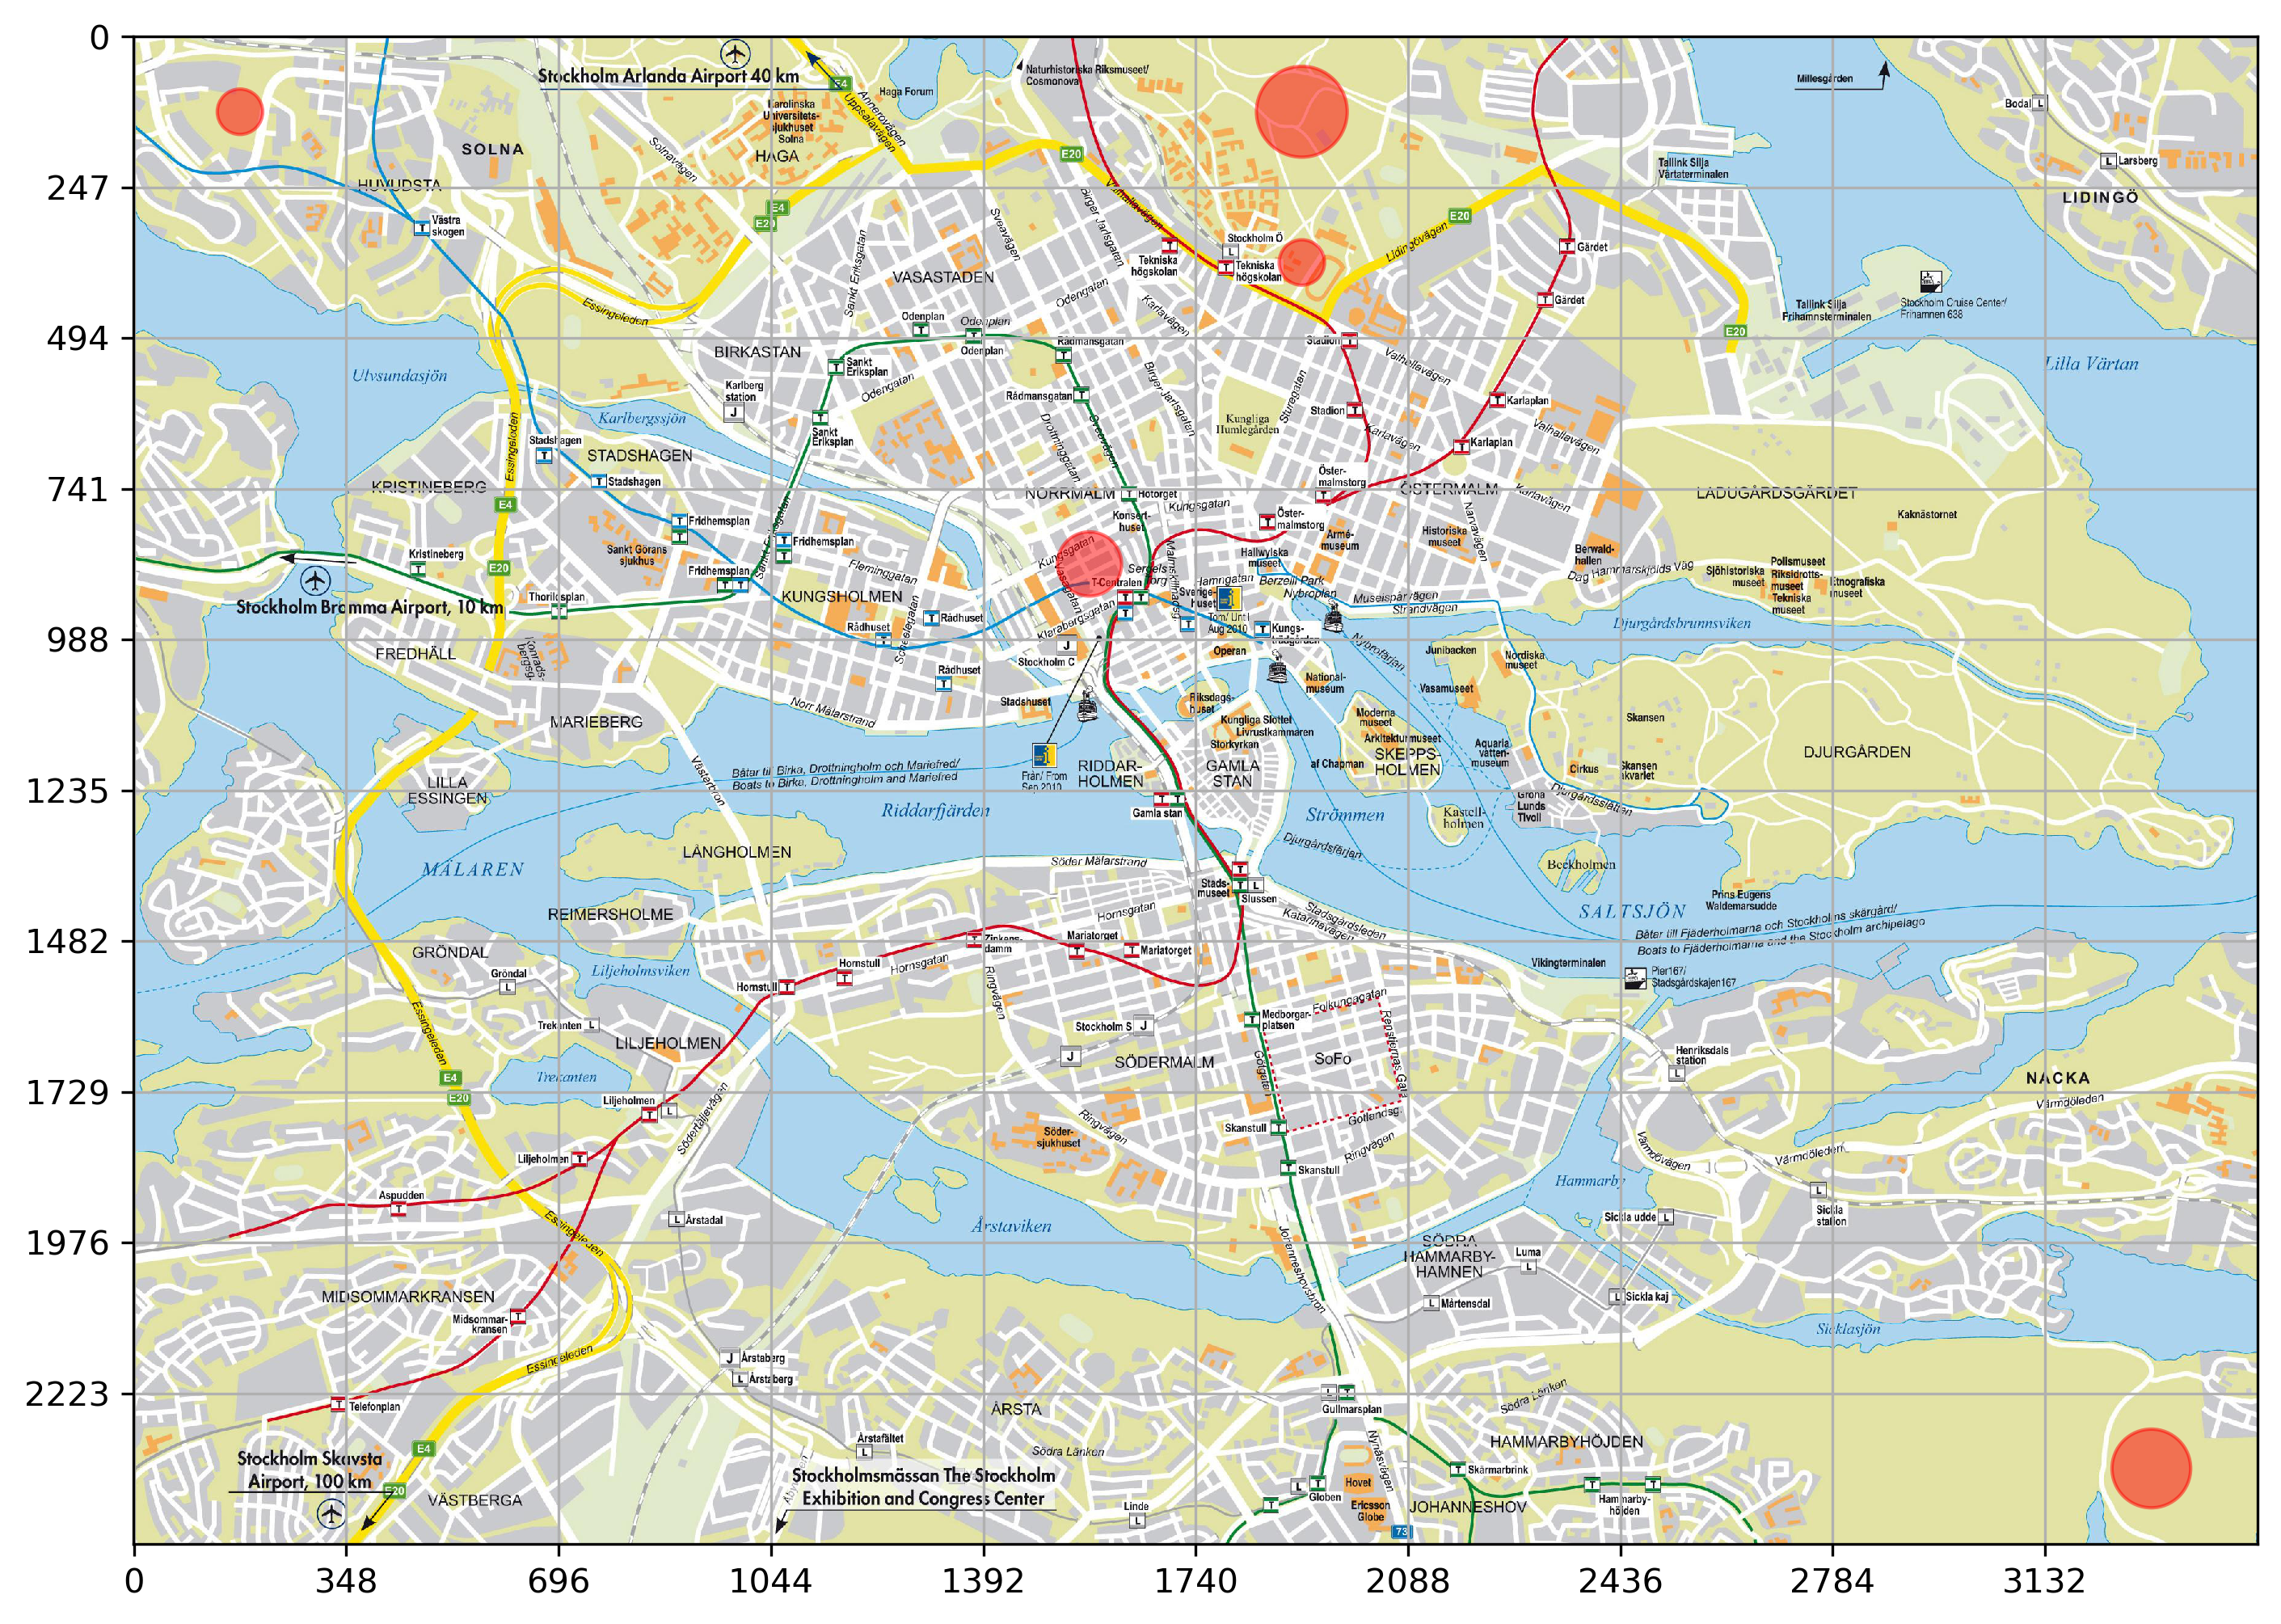

In [69]:
image = Image.open('stockholm-city-karta.jpg')
my_dpi=300.

fig = plt.figure(figsize=(float(image.size[0])/my_dpi,float(image.size[1])/my_dpi),dpi=my_dpi)
ax = fig.add_subplot(111)

plt.scatter(x, y, s=areas, c='r', alpha=0.5)
# plt.axis('off')

ax.imshow(image)
ax.xaxis.set_ticks(np.arange(GRID_RES) * STEP_X)
ax.yaxis.set_ticks(np.arange(GRID_RES) * STEP_Y)
plt.grid()
plt.show()